In [ ]:
from google.colab import drive
import os
import sys
from IPython.display import HTML, display
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Concatenate, BatchNormalization, SimpleRNNCell, RNN, SimpleRNN, LSTM, Embedding, Bidirectional, TimeDistributed, Conv1D, Conv2D, MaxPool1D, MaxPool2D, GlobalMaxPool1D, GlobalMaxPool2D, AveragePooling1D, AveragePooling2D
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import Input, Model, Sequential

drive.mount("/content/drive", force_remount=True)
try:
    my_path = "/content/notebooks"
    os.symlink("/content/drive/MyDrive/ColabNotebooks/my_env", my_path)
    sys.path.insert(0, my_path)
except:
    pass
os.chdir(my_path)

def set_css():
  display(HTML("""
  <style>
    pre {white-space: pre-wrap;}
  </style>
  """))
get_ipython().events.register("pre_run_cell", set_css)

plt.style.use("dark_background")

Mounted at /content/drive


In [ ]:
gen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True, validation_split=0.2)
flow_tr = gen.flow_from_directory(directory="../../Computer Vision/dogsandcats", target_size=(224, 224), subset="training")
flow_test = gen.flow_from_directory(directory="../../Computer Vision/dogsandcats", target_size=(224, 224), subset="validation")

Found 84 images belonging to 2 classes.
Found 84 images belonging to 2 classes.


 https://github.com/tensorflow/tensorflow/blob/v2.3.1/tensorflow/python/keras/applications/vgg16.py#L45-L225

 https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16

# Modeling

## Implementation

In [ ]:
inputs = Input()

z = Conv2D(input_shape=(224, 224, 3), filters=64, kernel_size=(3, 3), padding="same", activation="relu")(inputs)
z = Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu")(z)
z = MaxPool2D(pool_size=(2, 2), strides=(2, 2)(z))
z = Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu")(z)
z = Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu")(z)
z = MaxPool2D(pool_size=(2, 2), strides=(2, 2)(z))
z = Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu")(z)
z = Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu")(z)
z = Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu")(z)
z = MaxPool2D(pool_size=(2, 2),strides=(2, 2)(z))
z = Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu")(z)
z = Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu")(z)
z = Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu")(z)
z = MaxPool2D(pool_size=(2, 2),strides=(2, 2)(z))
z = Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu")(z)
z = Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu")(z)
z = Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu")(z)
z = MaxPool2D(pool_size=(2, 2),strides=(2, 2)(z))
z = Flatten()(z)
z = Dense(units=4096, activation="relu")(z)
z = Dense(units=4096, activation="relu")(z)

outputs = Dense(units=2, activation="softmax")(z)

## Using `tensorflow.keras.applications.VGG16()`

In [ ]:
vgg = tf.keras.applications.VGG16(input_shape=(224, 224, 3), include_top=False, weights="imagenet")
vgg.trainable = False

vgg.summary()

model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(units=256, activation="relu"))
model.add(Dense(units=256, activation="relu"))
model.add(Dense(units=2, activation="softmax"))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])

model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
hist = model.fit(flow_tr, epochs=10)

Epoch 1/10


InvalidArgumentError: ignored

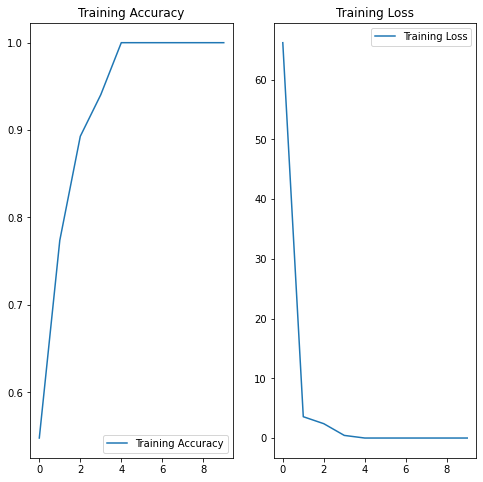

In [ ]:
acc = history.history['accuracy']

loss = history.history['loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()